# Decision Trees


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [36]:
df = pd.read_csv('train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

splitting it into test and trainning data

In [37]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0 )

Trainning the model

In [38]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Applying the model on the test data

In [39]:
predicted = tree_model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 4 6 0 0 1 7 1 5 7 8 5 1 5 9 6 9 2 2 8 4 6 2 5 3 4 8 2 8 9 7 8 4
 5 2 7 4 3 1 7 7 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [40]:
print("Accuracy:", tree_model.score(X_test, y_test))

('Accuracy:', 0.842047619047619)


In [41]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


confusion_matrix:
[[1874    0   26   27    8   32   44    7   34   12]
 [   1 2208   25   19    8   23    6   24   35    6]
 [  39   26 1707   58   42   36   57   60   78   29]
 [  16   13   60 1798   25  104   21   22   85   47]
 [   6   14   44   19 1689   17   32   26   47  132]
 [  46   17   18  125   16 1479   55   20   63   55]
 [  55   11   38   19   37   53 1800    7   46   11]
 [  10   13   49   19   37   19    4 1940   31   69]
 [  18   24   52   94   54   66   63   36 1488   96]
 [  21    9   27   40   98   43   11   72   58 1700]]


In [42]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.91      0.90      2064
          1       0.95      0.94      0.94      2355
          2       0.83      0.80      0.82      2132
          3       0.81      0.82      0.82      2191
          4       0.84      0.83      0.84      2026
          5       0.79      0.78      0.79      1894
          6       0.86      0.87      0.86      2077
          7       0.88      0.89      0.88      2191
          8       0.76      0.75      0.75      1991
          9       0.79      0.82      0.80      2079

avg / total       0.84      0.84      0.84     21000



**Viewing the the ones that predicted wrong**

In [22]:
(y_test != predicted).sum()

3278

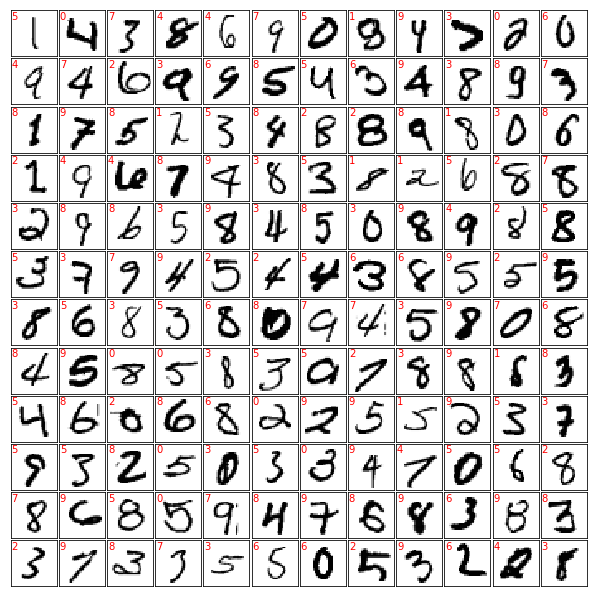

In [30]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[i]), color='red')
    
    # label the image with the target value
    #if predicted[i] == expected[i]:
    #    ax.text(0, 7, str(predicted[i]), color='green')
    #else:
    #    ax.text(0, 7, str(predicted[i]), color='red')
